Можем ли мы с помощью нейрона решать задачи классификации, так же как и с помощью логистической регрессии? Да, для этого его предсказание отправим в основу лог. регрессии — функцию, называемую сигмоида, и поменяем loss на BCE.

Ваша финальная задача модуля состоит в том чтобы дополнить текущую заготовку до рабочего нейрона классификации,. Для этого нужно задать функции для подсчета градиентов и функцию для обучения

Мы сгенерировали для вас тренировочный датасет. Вам нужно обучиться на нём и оставить внутри переменной n_class свою модель. Мы прогоним её на скрытом датасете и в случае если модель показала точность > 90%, то задача засчитывается как выполненная.


Для начала немного задач по numpy, для разминки

In [97]:
# Сделайте функцию, которая делает квадратный массив заданного размера а
# Значения в массиве по главной диагонали True, остальные False
# подсказка - используйте np.eye

def create_matrix(size):
    return np.eye(size)

tests = [[], [[True]], [[True, False], [False, True]], [[True, False, False], [False, True, False], [False, False, True]]]

passed = True
for i, test in enumerate(tests):
    print(test)
    print(create_matrix(i))
    if not np.equal(test, create_matrix(i)).all():
        passed = False
if passed:
    print("Поздравляем")
else:
    print("Попробуйте ещё")

[]
[]
[[True]]
[[1.]]
[[True, False], [False, True]]
[[1. 0.]
 [0. 1.]]
[[True, False, False], [False, True, False], [False, False, True]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Поздравляем


In [98]:
# используя np.where получите из массива а, 
# массив где числа больше 8 заменены на 1/x, где x это число, которое больше 8
a = np.array([1,1,2,3,5,8,13,21,34])
b = np.where(a <= 8, a, 1/a)
print(b)
if np.equal(b, [1,1,2,3,5,8,1/13,1/21,1/34]).all():
    print("Правильно!")
else:
    print("Попробуйте ещё")

[1.         1.         2.         3.         5.         8.
 0.07692308 0.04761905 0.02941176]
Правильно!


In [99]:
# Сделайте функцию, моделирующую нейрон W*x+b с помощью @(np.dot)
# в данном случае, x может быть любого размера, 
# его элементы будут домножаться на w, который равен индексу элемента x
# например x = (1, 1, 1) w = (0, 1, 2)
# а b возьмём равным 7

def neuron_func(x):
    w = np.arange(len(x))
    return w @ np.array(x) + 7

tests = [
[[1,1,1,1], [13]],
[[7,24, 11, 99], [350]],
[[3, 3, -50], [-90]],
[[926, 000, 42, 35, 999], [4192]]
]

passed = True
for test in tests:
    print(test[0], neuron_func(test[0]), test[1])
    if not neuron_func(test[0]) == test[1]:
        passed = False

if passed:
    print("Успех")
else:
    print("Попробуйте ещё")

[1, 1, 1, 1] 13 [13]
[7, 24, 11, 99] 350 [350]
[3, 3, -50] -90 [-90]
[926, 0, 42, 35, 999] 4192 [4192]
Успех


In [100]:
# Сделайте функцию, которая сконкатенирует два numpy массива вертикально
# Пример func[[[1, 2]], [[3, 4]]) = [[1, 2], [3, 4]]

def func(x, y):
    return np.concatenate((x, y), axis=0)

tests = [
         [[[1,2]],[[3,4]],[[1, 2],[3, 4]]],
         [[[88,999,5]],[[3,3,1]],[[88,999,5],[3,3,1]]],
         [[[1]],[[2]], [[1], [2]]],
         [[[1], [2], [3]],[[4],[5],[6]], [[1], [2], [3], [4], [5], [6]]]
]

passed = True
for test in tests:
    print(func(test[0], test[1]))
    print(test[2])
    print('***')
    if not (func(test[0], test[1]) == test[2]).all():
        passed = False

if passed:
    print("Верно")
else:
    print("Попробуйте ещё")

[[1 2]
 [3 4]]
[[1, 2], [3, 4]]
***
[[ 88 999   5]
 [  3   3   1]]
[[88, 999, 5], [3, 3, 1]]
***
[[1]
 [2]]
[[1], [2]]
***
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1], [2], [3], [4], [5], [6]]
***
Верно


Теперь вы готовы перейти к основной задаче

## Логистическая регрессия



Импортируем основные библиотеки:

In [101]:
import math
import numpy as np
import seaborn as sns

Определим сигмоиду для обработки вывода нейрона:

In [102]:
def sigmoid(x):
    return 1/(1 + math.exp(-x))

Определим BCE loss: 

In [103]:
def BCE_loss(target_labels, predicts):
    sum = 0
    for i in range(len(target_labels)):
        sum += (-target_labels[i] * np.log(predicts[i]) \
               - (1-target_labels[i]) * np.log(1 - predicts[i])) 
    return sum / len(target_labels)

В данной формуле могут возникнуть нерегулярности, в случае, если нейрон предсказывает идеально и если предсказывает идеально наоборот.



In [104]:
# идеальное предсказание
print(BCE_loss([0, 1], [0, 1]))

nan


C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_3300\661720711.py:4: RuntimeWarning: divide by zero encountered in log
  sum += (-target_labels[i] * np.log(predicts[i]) \
C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_3300\661720711.py:4: RuntimeWarning: invalid value encountered in scalar multiply
  sum += (-target_labels[i] * np.log(predicts[i]) \
C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_3300\661720711.py:5: RuntimeWarning: divide by zero encountered in log
  - (1-target_labels[i]) * np.log(1 - predicts[i]))
C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_3300\661720711.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  - (1-target_labels[i]) * np.log(1 - predicts[i]))


In [105]:
# антиидеальное предсказание
print(BCE_loss([0, 1], [1, 0]))

inf


C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_3300\661720711.py:5: RuntimeWarning: divide by zero encountered in log
  - (1-target_labels[i]) * np.log(1 - predicts[i]))
C:\Users\ilkhom-pc\AppData\Local\Temp\ipykernel_3300\661720711.py:4: RuntimeWarning: divide by zero encountered in log
  sum += (-target_labels[i] * np.log(predicts[i]) \


Для второго случая поможет правильная инициализация весов, а в первом случае проблема состоит в том, что хоть сеть и предсказывает правильно, но в формуле всё равно считаются оба логарифма. Один из которых умножается на 0, но всё равно равен nan, а nan*0 = nan

Давайте поправим формулу так, чтобы считался один логарифм за раз, например, добавим if проверку на target_labels[i] и будем считать только одно слагаемое — то, которое не домножается на 0 в обычной формуле.

In [106]:
def BCE_loss(target_labels, predicts):
    sum = 0
    for i in range(len(target_labels)):
        if target_labels[i] == 0:
            sum += -(1-target_labels[i]) * np.log(1 - predicts[i])
        else:
            sum += -target_labels[i] * np.log(predicts[i])
    return sum / len(target_labels)

Проверим значение теперь. Должно быть 0, а не nan:

In [107]:
print(BCE_loss([0, 1], [0, 1]))

0.0


## От регрессии к нейрону

Перейдем к нейрону — нужно задать ему функции для подсчета градиентов w и b и для обучения.

Напомню, что итоговая функция потерь выглядит как BCE_loss(sigmoid(W*x + b)), это будет полезно для вывода формулы производной

In [108]:
class OneLinearLearnableNeuronClassification:
    def __init__(self, w, b):
        self.w = np.array(w)
        self.b = np.array(b)

        self.n_iter = # выберите количество итераций самостоятельно
        self.lr = # выберите lr сами
    
    def calc_grad_w(self, x, y):
        # место для вашего кода

    def calc_grad_b(self, x, y):
        # место для вашего кода

    def apply(self, x):
        return sigmoid(x * self.w + self.b)
    
    def train(self, x, y):
        # место для вашего кода 

    def print_weights(self):
        print('Neuron: w = {}, b = {}'.format(self.w, self.b))

In [128]:
import math
import numpy as np
import seaborn as sns

def sigmoid(x):
    return 1/(1 + math.exp(-x))

def BCE_loss(target_labels, predicts):
    sum = 0
    for i in range(len(target_labels)):
        if target_labels[i] == 0:
            sum += -(1 - target_labels[i]) * np.log(1 - predicts[i])
        else:
            sum += -target_labels[i] * np.log(predicts[i])
    return sum / len(target_labels)

class OneLinearLearnableNeuronClassification:
    def __init__(self, w, b):
        self.w = np.array(w)
        self.b = np.array(b)

        self.n_iter = 500
        self.lr = 0.1
    
    def calc_grad_w(self, x, y):
        return -x * (y - sigmoid(x * self.w + self.b))

    def calc_grad_b(self, x, y):
        return -(y - sigmoid(x * self.w + self.b))

    def apply(self, x):
        return sigmoid(x * self.w + self.b)
    
    def train(self, x, y):
        for i in range(self.n_iter):
            dw = 0.0
            db = 0.0
            for j in range(len(x)):
                dw += self.calc_grad_w(x[j], y[j])
                db += self.calc_grad_b(x[j], y[j])
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def print_weights(self):
        print('Neuron: w = {}, b = {}'.format(self.w, self.b))

n_test = OneLinearLearnableNeuronClassification(1, 1)
print(n_test.calc_grad_w(1,1))
print(n_test.calc_grad_w(2,2))

-0.11920292202211769
-2.0948517463551335


### Проверка кода

Проверим этот код. Проверка calc_grad_w при весах 1, 1 должна выдавать такие значения: 

> calc_grad_w(1, 1) = -0.11920292202211769


> calc_grad_w(2, 2) = -2.0948517463551335



In [111]:
n_test = OneLinearLearnableNeuronClassification(1, 1)
print(n_test.calc_grad_w(1,1))
print(n_test.calc_grad_w(2,2))

-0.11920292202211769
-2.0948517463551335


Подсказка-проверка calc_grad_b при весах 1, 1 должна выдавать такие значения:

> calc_grad_b(1, 1) = -0.11920292202211769

> calc_grad_b(2, 2) = -1.0474258731775667

In [112]:
n_test = OneLinearLearnableNeuronClassification(1, 1)
print(n_test.calc_grad_b(1,1))
print(n_test.calc_grad_b(2,2))

-0.11920292202211769
-1.0474258731775667


## Данные и обучение нейрона

Генерируем данные для обучения. Мы будем учить нейрон отличать числа больше 5 (класс 1) от чисел меньше 5 (класс 0). Да, задача довольно простая, но надо же с чего-то начинать?

[6.5859699  9.33936117 9.45449693 0.32518161 8.77988831 4.10263054
 6.74612016 0.78969756 3.01064814 8.52832278]
[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0]


<AxesSubplot: >

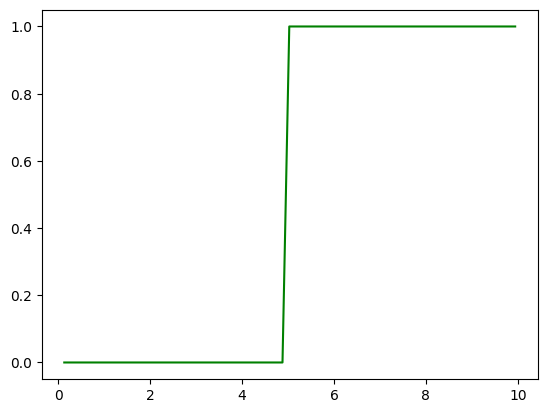

In [123]:
x_class_train = (np.random.random((200))) * 10
print(x_class_train[0:10])

y_class_train = [1.0 if x > 5 else 0.0 for x in x_class_train]
print(y_class_train[0:10])

sns.lineplot(x = x_class_train, y = y_class_train, color = "g")

Инициализируем нейрон и обучаем его:

In [136]:
n_class = OneLinearLearnableNeuronClassification(1.0, 1.0)

n_class.train(x_class_train, y_class_train)

## Подсчет точности и оценка работы

Зададим функцию для подсчета точности нашей сети — процентного соотношения правильных ответов ко всем ответам:

In [137]:
def calc_accuracy(predictions, target_classes):
    predictions = np.round(predictions)
    correct_predicts = np.equal(predictions, target_classes)
    return correct_predicts.sum() / len(correct_predicts)

In [138]:
predictions = [n_class.apply(x) for x in x_class_train]

print(calc_accuracy(predictions, y_class_train))

0.9


Проверка для финальной задачи:

In [132]:
x_class_test = (np.random.random((40))) * 10
y_class_test = [1 if x > 5 else 0 for x in x_class_test]

predictions = [n_class.apply(x) for x in x_class_test]
if calc_accuracy(predictions, y_class_test) > 0.9:
    print("Работа выполнена успешно")
else:
    print("Не достигнут нужный результат, попробуйте ещё раз")

Не достигнут нужный результат, попробуйте ещё раз
